In [2]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.linalg import eigh
import qutip as qt
import sympy as sym

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})

# Comparison of sqcircuit, numeric and spin-boson models vs truncation

In [3]:
Δ = 0.1
n_eig = 3
nmax_r_values = np.array([4,5,5,6,6 ,7 ,7 ,8 ,8 ,9 ])
nmax_f_values = np.array([6,6,8,8,10,10,12,12,14,14])

E_sq = []
E_n  = []
E_sb = []

for nmax_r, nmax_f in zip(nmax_r_values, nmax_f_values):
    print(nmax_f)
    
    fluxonium = sq_ext.KIT_fluxonium(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Δ = Δ, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

6
6
8
8
10
10
12
12
14
14


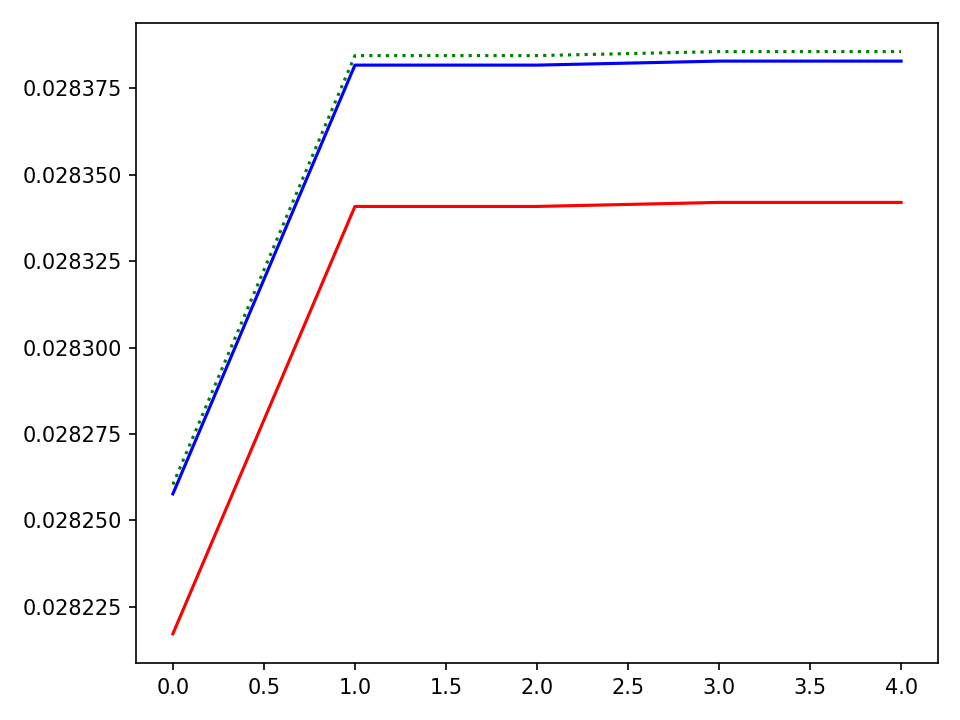

In [4]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(E_sq[5:, 1]-E_sq[0, 1], 'r' )
ax.plot(E_n [5:, 1]-E_n [0, 1], ':g')
ax.plot(E_sb[5:, 1]-E_sb[0, 1], 'b' )
    
fig.tight_layout()
fig.show()

In [9]:
importlib.reload(sq_ext)
Δ_values = np.geomspace(1e-4, 1, 30)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_n  = []
E_sb = []

for Δ in Δ_values:
    fluxonium = sq_ext.KIT_fluxonium(Δ=Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Δ=Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ, interaction_prefactor=1)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2, interaction_prefactor=1)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Δ = Δ, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

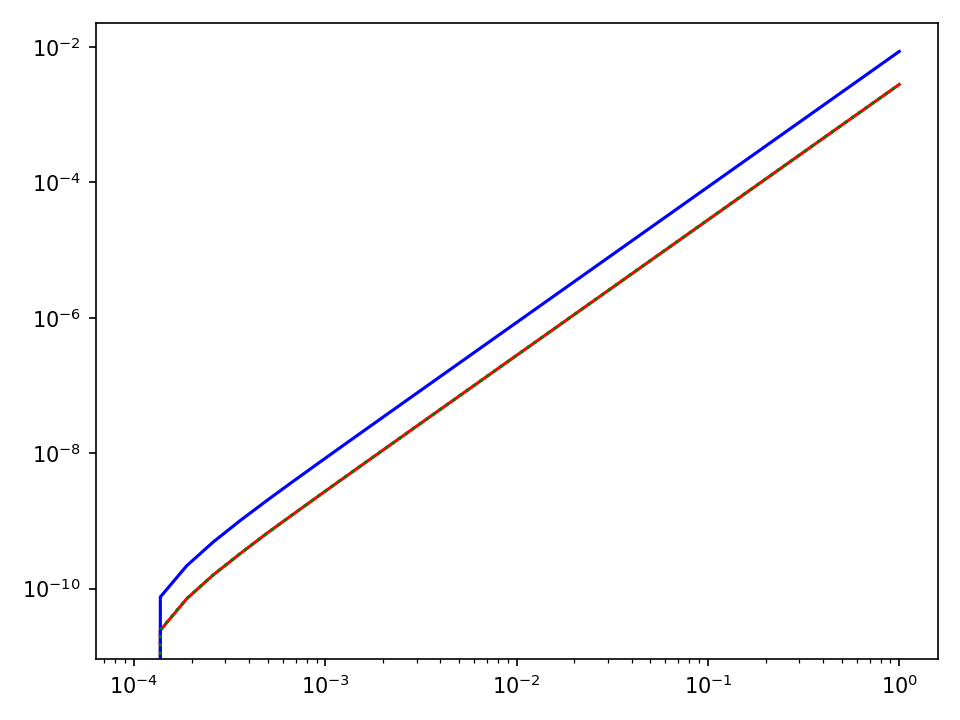

In [11]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(Δ_values, np.abs(E_sq[:, 1]-E_sq[0, 1]), 'r' )
ax.plot(Δ_values, np.abs(E_sb[:, 1]-E_sb[0, 1]), 'b' )
ax.plot(Δ_values, np.abs(E_n [:, 1]-E_n [0, 1]), ':g')
ax.set_xscale('log')
ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

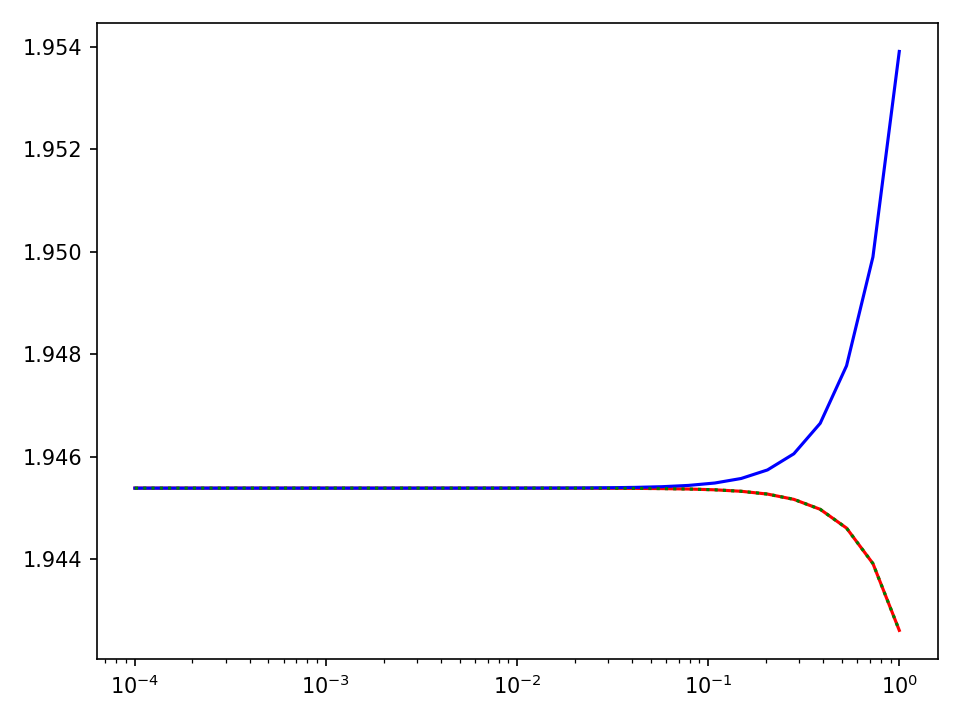

In [12]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(Δ_values, E_sq[:, 1], 'r' )
ax.plot(Δ_values, E_sb[:, 1], 'b' )
ax.plot(Δ_values, E_n [:, 1], ':g')
ax.set_xscale('log')
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

In [47]:
importlib.reload(sq_ext)
Δ = 0.1
param_values = np.geomspace(1, 100, 50)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_n  = []
E_sb = []

for Lq in param_values:
    fluxonium = sq_ext.KIT_fluxonium(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ, Lq=Lq)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Lq=Lq, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Lq=Lq, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

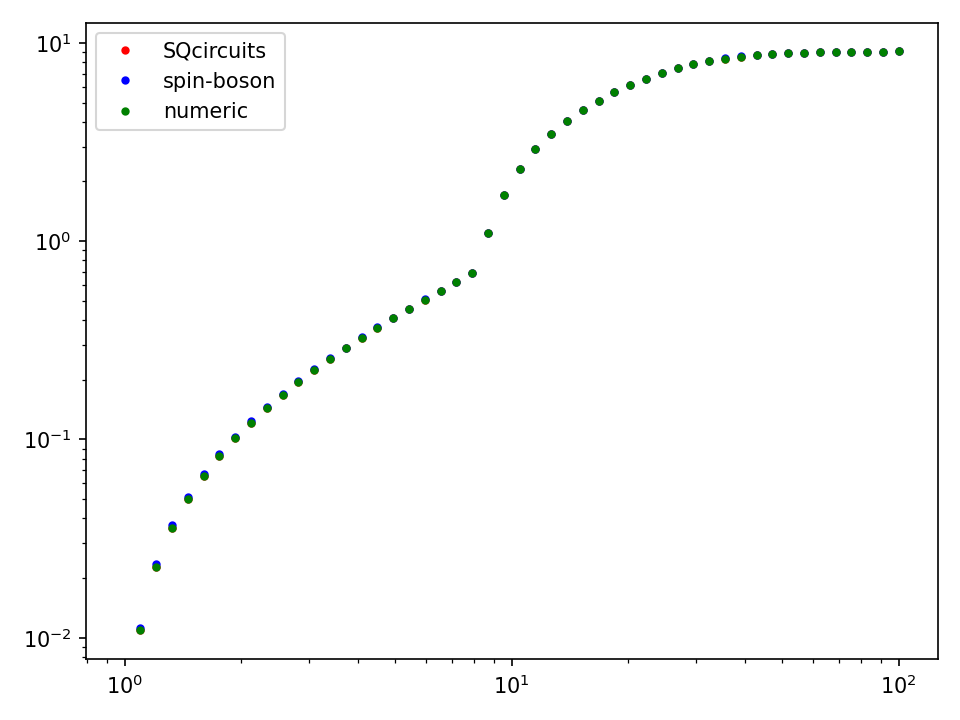

In [48]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, np.abs(E_sq[:, 1]-E_sq[0, 1]), '.r', label='SQcircuits' )
ax.plot(param_values, np.abs(E_sb[:, 1]-E_sb[0, 1]), '.b', label='spin-boson' )
ax.plot(param_values, np.abs(E_n [:, 1]-E_n [0, 1]), '.g', label='numeric'    )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()    
fig.tight_layout()
fig.show()

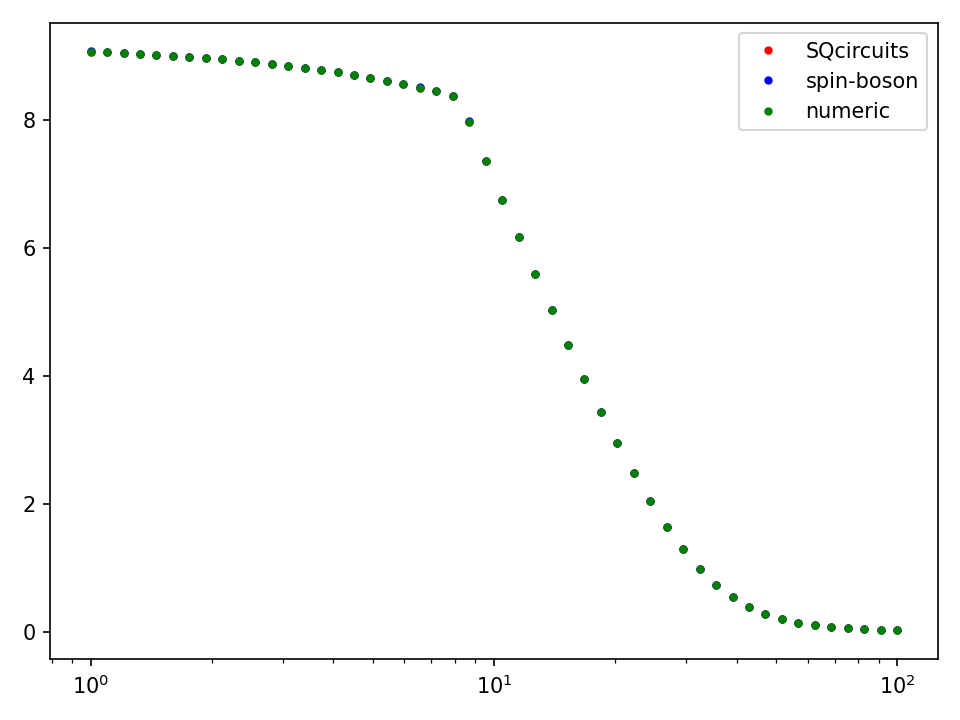

In [51]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, E_sq[:, 1], '.r', label='SQcircuits' )
ax.plot(param_values, E_sb[:, 1], '.b', label='spin-boson' )
ax.plot(param_values, E_n [:, 1], '.g', label='numeric'    )
ax.set_xscale('log')
ax.legend()    
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

In [33]:
plt.close('all')